<a href="https://colab.research.google.com/github/Neha1025/NN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import io
from google.colab import files

In [5]:
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [10]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
X=pd.concat([X,geography,gender],axis=1)


In [12]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
#Initialising the ANN
classifier=Sequential()

In [36]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [37]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))

In [38]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0

In [39]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 1.1803 - accuracy: 0.7162 - val_loss: 0.5288 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 1.0639 - accuracy: 0.7697 - val_loss: 0.5087 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 1.0571 - accuracy: 0.7944 - val_loss: 0.5082 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.9606 - accuracy: 0.7955 - val_loss: 0.5049 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 1.0239 - accuracy: 0.7955 - val_loss: 0.5046 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.9988 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 1.0357 - accuracy: 0.7962 - val_loss: 0.5063 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


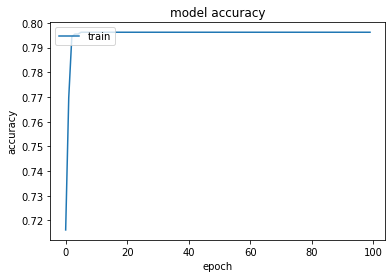

In [41]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
#plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

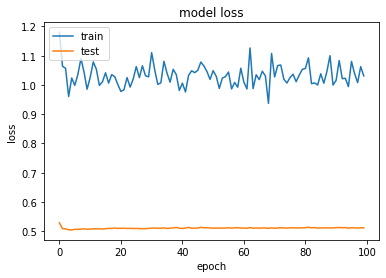

In [42]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


In [45]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7975
